In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import matplotlib.colors as colors
import pandas as pd
import scipy as sp
from scipy.stats import gaussian_kde

**Plot of 1-dim Rastrigin function**

FileNotFoundError: [Errno 2] No such file or directory: '1d_Rastrigin_results.csv'

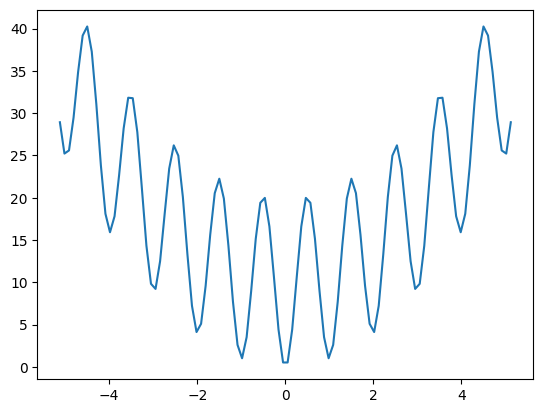

In [2]:
def Rastrigin_function_dimension_one(x):
    return 10 + x ** 2 - 10 * np.cos(2 * np.pi * x)

x = np.linspace(-5.12, 5.12, 100)
y = Rastrigin_function_dimension_one(x)

fig = plt.figure()
ax2d = plt.axes()
ax2d.plot(x, y)

df = pd.read_csv("1d_Rastrigin_results.csv", 
                 sep='[:, |_]',
                 engine='python', 
                 header=0,
                 usecols=['point', 'value'],
                 skiprows=5)

plt.plot(df.point, df.value, color='g')

hist = df.hist()

plt.show()

**Plot of 2-dim Rastrigin function**

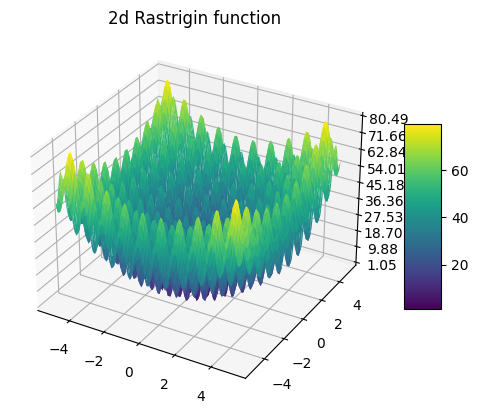

In [3]:
def Rastrigin_function_dimension_two(x, y):
    return 20 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

x = np.linspace(-5.12, 5.12, 100)     
y = np.linspace(-5.12, 5.12, 100)   
X, Y = np.meshgrid(x, y)
Z = Rastrigin_function_dimension_two(X, Y)

fig, ax3d = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax3d.plot_surface(X, Y, Z, rstride=1, cstride=1, # type: ignore
                cmap='viridis', edgecolor='none')

# Customize the z axis.
ax3d.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax3d.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('2d Rastrigin function')
plt.show()

**Projection plot for 2-dim Rastrigin**

In [43]:
df = pd.read_csv("2d_Rastrigin_all_results.csv", 
                 sep='[:, |_]',
                 engine='python', 
                 header=0,
                 usecols=['x', 'y', 'value'],
                 skiprows=5)  

In [44]:
df

,x,y,value
0,2.332116,2.484843,46.501485
1,1.584375,2.604443,45.843671
2,2.607998,2.895896,35.036651
3,2.844745,3.465141,44.253277
4,4.329181,3.522760,65.821954
...,...,...,...
999995,5.271620,0.690752,53.258628
999996,4.176480,2.079257,28.524016
999997,2.906522,1.423509,31.017189
999998,2.745659,1.321738,33.914721


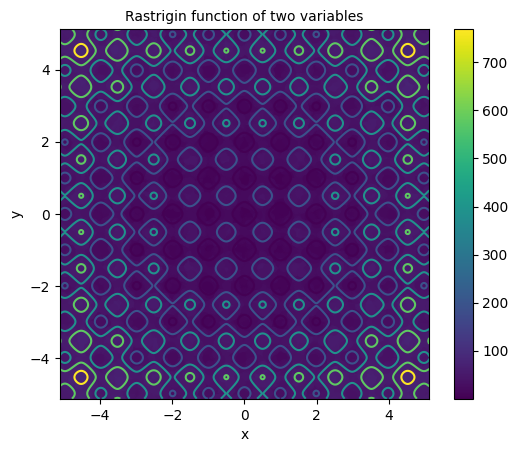

In [68]:
x_min = -5.12
x_max = 5.12
y_min = -5.12
y_max = 5.12

x = np.linspace(-5.12, 5.12, 2000)     
y = np.linspace(-5.12, 5.12, 2000)   
X, Y = np.meshgrid(x, y)

Z = Rastrigin_function_dimension_two(X, Y)

df = pd.read_csv("2d_Rastrigin_all_results.csv", 
                 sep='[:, |_]',
                 engine='python', 
                 header=0,
                 usecols=['x', 'y', 'value'],
                 skiprows=5)  

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.imshow(Z, extent=[x_min, x_max, y_min, y_max],
           norm=colors.Normalize(vmin=0, vmax=80),
           origin='lower')

sc = plt.scatter(df.x, df.y, c=df.value)
plt.colorbar(sc)
plt.contour(X, Y, Z, extend='both')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Rastrigin function of two variables" , fontsize=10)

plt.show() 

<Axes: >

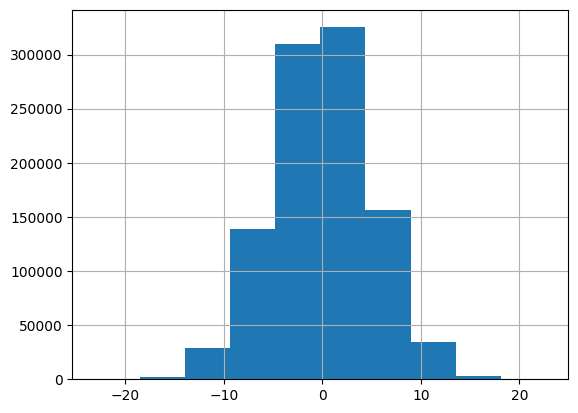

In [69]:
df.x.hist()

<Axes: >

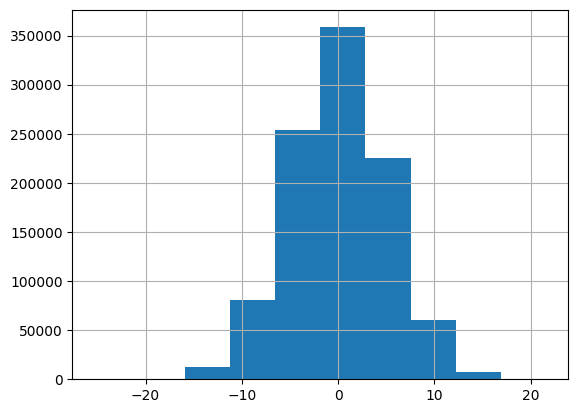

In [70]:
df.y.hist()

**Plot of 2-dim Rosenbrock function**

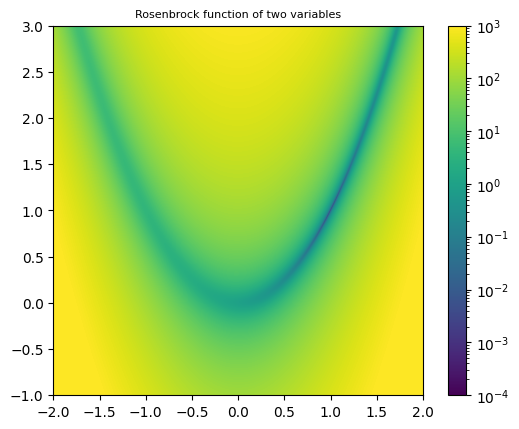

In [9]:
def Rosenbrock_function_dimension_two(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

x_min = -2.0
x_max = 2.0
y_min = -1.0
y_max = 3.0

X, Y = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

Z = Rosenbrock_function_dimension_two(X, Y)

plt.imshow(Z, extent=[x_min, x_max, y_min, y_max],norm=colors.LogNorm(vmin=10**(-4), vmax=10**3),
           origin='lower')

plt.colorbar()

plt.title("Rosenbrock function of two variables" , fontsize=8)

plt.show()